### Importing the required Libraries.

In [1]:
#importing the required libraries

%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpldatacursor import datacursor
from sklearn.metrics import mean_squared_error
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

### Some CSS Customizations

In [2]:
#customizing with some CSS

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Data Cleaning


In [5]:
#Reading/Cleaning the Movies Data.

df = pd.read_excel('data/Movies.xlsx',index_col=None)
df['Year'] = (df['Movie Name']).str.extract('(\d\d\d\d)',expand = True)
df['Movie Name'] = (df['Movie Name']).str.replace('(\(....\))','')
df1 = pd.DataFrame(df)

#I have separted the combined Genre of the movies, so that I can perform some calculations on Genre
df2 = pd.DataFrame(df1['Genre'].str.split('\|').tolist(),columns=['a','b','c','d','e','f'])
df2['Movie ID'] = df1['Movie ID']
df3 = df.merge(df2)
df3.drop(['Genre', 'd','e','f'], axis=1, inplace=True)
df4 = pd.melt(df3, id_vars=["Movie ID", "Movie Name","Year"], 
                  var_name="Date", value_name="Genre")
del df4['Date']
movies=df4.sort_values(by=['Movie ID'])
movies = movies.dropna()
movies.columns = [x.strip().replace(' ', '_') for x in movies.columns]


In [6]:
#Reading/Cleaning the Ratings Data.

ratings = pd.read_excel('data/Ratings.xlsx',index_col=None)
#del ratings['Timestamp'] #Removing Timestamp column
ratings.columns = [x.strip().replace(' ', '_') for x in ratings.columns]

In [7]:
#Reading/Cleaning the Users Data.
users = pd.read_excel('data/Users.xlsx',index_col=None)
#del users['Zipcode'] #Removing Zipcode column, since it is not required.
for index,row in users.iterrows():
    if(row.Occupation == 0):
        users.loc[index,"Profession"]="Other"
    elif(row.Occupation == 1):
        users.loc[index,"Profession"]="Academic"
    elif(row.Occupation == 2):
        users.loc[index,"Profession"]="Artist"
    elif(row.Occupation == 3):
        users.loc[index,"Profession"]="Clerk"
    elif(row.Occupation == 4):
        users.loc[index,"Profession"]="College Student"
    elif(row.Occupation == 5):
        users.loc[index,"Profession"]="Customer Service"
    elif(row.Occupation == 6):
        users.loc[index,"Profession"]="Doctor"
    elif(row.Occupation == 7):
        users.loc[index,"Profession"]="Manager"
    elif(row.Occupation == 8):
        users.loc[index,"Profession"]="Farmer"
    elif(row.Occupation == 9):
        users.loc[index,"Profession"]="HomeMaker"
    elif(row.Occupation == 10):
        users.loc[index,"Profession"]="K-12 Student"
    elif(row.Occupation == 11):
        users.loc[index,"Profession"]="Lawyer"
    elif(row.Occupation == 12):
        users.loc[index,"Profession"]="Programmer"
    elif(row.Occupation == 13):
        users.loc[index,"Profession"]="Retired"
    elif(row.Occupation == 14):
        users.loc[index,"Profession"]="Sales"
    elif(row.Occupation == 15):
        users.loc[index,"Profession"]="Scientist"
    elif(row.Occupation == 16):
        users.loc[index,"Profession"]="Self-Employed"
    elif(row.Occupation == 17):
        users.loc[index,"Profession"]="Engineer"
    elif(row.Occupation == 18):
        users.loc[index,"Profession"]="Craftsman"
    elif(row.Occupation == 19):
        users.loc[index,"Profession"]="Unemployed"
    elif(row.Occupation == 20):
        users.loc[index,"Profession"]="Writer"

In [125]:
users.columns = [x.strip().replace(' ', '_') for x in users.columns]
users.head()

,User_ID,Sex,Age_Group,Occupation,Zipcode,Profession
0,1,F,1,10,48067,K-12 Student
1,2,M,56,16,70072,Self-Employed
2,3,M,25,15,55117,Scientist
3,4,M,45,7,2460,Manager
4,5,M,25,20,55455,Writer


In [126]:
#Merging Ratings data and Users Data
Users = users.merge(ratings)
Users.head()

,User_ID,Sex,Age_Group,Occupation,Zipcode,Profession,Movie_ID,Movie_Name,Year,Rating
0,1,F,1,10,48067,K-12 Student,1,Toy Story,1995,5
1,1,F,1,10,48067,K-12 Student,1028,Mary Poppins,1964,5
2,1,F,1,10,48067,K-12 Student,783,"Hunchback of Notre Dame, The",1996,4
3,1,F,1,10,48067,K-12 Student,783,"Hunchback of Notre Dame, The",1996,4
4,1,F,1,10,48067,K-12 Student,783,"Hunchback of Notre Dame, The",1996,4


In [10]:
#Merging Everything
final = movies.merge(Users)
del final['Zipcode']
del final['Timestamp']
final.head()

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
1,1,Toy Story,1995,Animation,6,F,50,9,HomeMaker,4
2,1,Toy Story,1995,Animation,8,M,25,12,Programmer,4
3,1,Toy Story,1995,Animation,9,M,25,17,Engineer,5
4,1,Toy Story,1995,Animation,10,F,35,1,Academic,5


In [11]:
#Final Dataset
final = final.sort_values(by=['User_ID'])


In [12]:
#Replacing the space in the column names
final.columns = [x.strip().replace(' ', '_') for x in final.columns]

In [13]:
final.head()

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
481490,1028,Mary Poppins,1964,Children's,1,F,1,10,K-12 Student,5
380413,783,"Hunchback of Notre Dame, The",1996,Children's,1,F,1,10,K-12 Student,4
380803,783,"Hunchback of Notre Dame, The",1996,Musical,1,F,1,10,K-12 Student,4
381193,783,"Hunchback of Notre Dame, The",1996,Animation,1,F,1,10,K-12 Student,4


In [14]:
f = final

### Data Story and some Interesting findings.

In [15]:
#Number Of Movies
f.Movie_ID.nunique()

3514

In [16]:
#Number Of Users
f.User_ID.nunique()

6040

In [17]:
#Number of Female Users
female = f[f.Sex=='F']
female.User_ID.nunique()

1709

In [18]:
#Number of Male Users
male = f[f.Sex=='M']
male.User_ID.nunique()

4331

In [19]:
# How many profession are there in the final dataframe?

print("Number of Professions:",f.Profession.nunique())
professions = f.groupby(['Profession'])['User_ID'].nunique().reset_index()
#professions = professions.sort_values(by=['User_ID'],ascending=False)
professions['Percentage'] = ((professions.User_ID/f.User_ID.nunique())*100)
professions

Number of Professions: 21


,Profession,User_ID,Percentage
0,Academic,528,8.741722
1,Artist,267,4.420530
2,Clerk,173,2.864238
3,College Student,759,12.566225
4,Craftsman,70,1.158940
5,Customer Service,112,1.854305
6,Doctor,236,3.907285
7,Engineer,502,8.311258
8,Farmer,17,0.281457
9,HomeMaker,92,1.523179


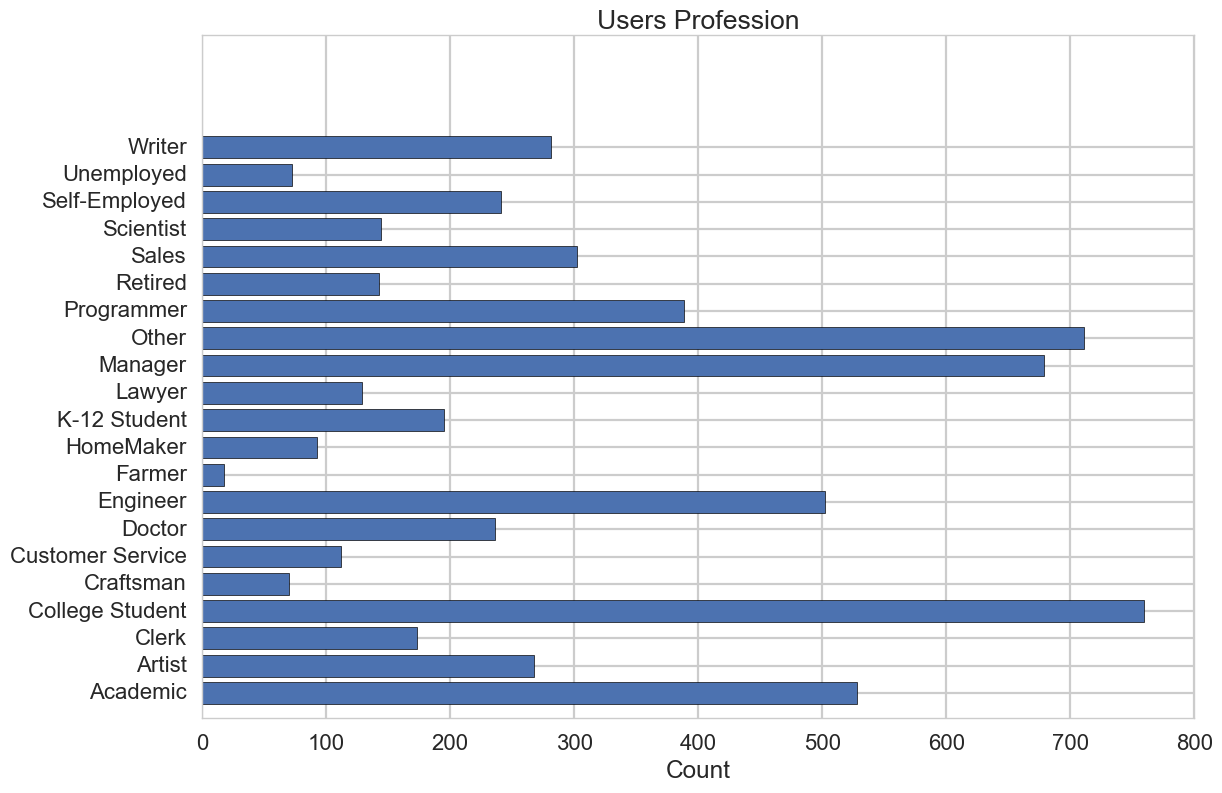

In [20]:
#bar graph on number of professions.
pos = np.arange(f.Profession.nunique())+.9  # the bar centers on the y axis

plt.barh(pos,professions.User_ID, align='center')
plt.yticks(pos, (professions.Profession))
plt.xlabel('Count')
plt.title('Users Profession')


In [21]:
#How many Genre are there in total and their counts?

print("Number of Genre:",f.Genre.nunique())
f.groupby(['Genre'])['Movie_ID'].nunique().reset_index()

Number of Genre: 18


,Genre,Movie_ID
0,Action,447
1,Adventure,251
2,Animation,95
3,Children's,222
4,Comedy,1123
5,Crime,191
6,Documentary,91
7,Drama,1456
8,Fantasy,51
9,Film-Noir,44


In [22]:
f.head()
pd.isnull(f).any(1).nonzero()[0]

array([], dtype=int64)

In [23]:
#Most watched Genre by Females
female_genre = f[f.Sex=='F']
female_genre = female_genre.groupby(['Genre'])['User_ID'].nunique().reset_index()
female_genre['Watched Genre %'] = (female_genre.User_ID/female.User_ID.nunique())*100
#female.sort_values(by=['User_ID'],ascending=False)
female_genre


,Genre,User_ID,Watched Genre %
0,Action,1679,98.244587
1,Adventure,1598,93.504974
2,Animation,1323,77.413692
3,Children's,1493,87.361030
4,Comedy,1704,99.707431
5,Crime,1550,90.696314
6,Documentary,538,31.480398
7,Drama,1708,99.941486
8,Fantasy,1130,66.120538
9,Film-Noir,1049,61.380925


In [24]:
#Most watched Genre by Males
male_genre = f[f.Sex=='M']
male_genre = male_genre.groupby(['Genre'])['User_ID'].nunique().reset_index()
male_genre['Watched Genre %'] = (male_genre.User_ID/male.User_ID.nunique())*100
#female.sort_values(by=['User_ID'],ascending=False)
male_genre

,Genre,User_ID,Watched Genre %
0,Action,4307,99.445855
1,Adventure,4180,96.513507
2,Animation,3414,78.827061
3,Children's,3762,86.862157
4,Comedy,4325,99.861464
5,Crime,4067,93.904410
6,Documentary,1626,37.543293
7,Drama,4328,99.930732
8,Fantasy,2940,67.882706
9,Film-Noir,3101,71.600092


In [28]:
#What Genre is mostly watched by Under 18 people
f.head()
under18 = f[f.Age_Group==1]
under18 = under18.groupby(['Genre'])['User_ID'].nunique().reset_index()
under18.sort_values(by=['User_ID'],ascending=False)


,Genre,User_ID
4,Comedy,222
7,Drama,222
0,Action,220
15,Thriller,216
13,Romance,214
14,Sci-Fi,212
1,Adventure,210
3,Children's,202
2,Animation,194
5,Crime,186


In [27]:
#Mean ratings of All the Users on Different Genre.
f=final
ratings = f.groupby(['Genre'])
Mean_Ratings = ratings['Rating'].mean()
Mean_Ratings

Genre
Action         3.473946
Adventure      3.436639
Animation      3.691735
Children's     3.462534
Comedy         3.543695
Crime          3.713084
Documentary    3.965517
Drama          3.763830
Fantasy        3.396568
Film-Noir      4.075188
Horror         3.279035
Musical        3.640094
Mystery        3.674377
Romance        3.590157
Sci-Fi         3.401993
Thriller       3.588677
War            3.922918
Western        3.676669
Name: Rating, dtype: float64

In [29]:
#Mean ratings of Male Users on Different Genre.

#ratings = ratings.apply(lambda x: x[x['User_ID'] == 4])
ratings = f[f.Sex=='M']
ratings = ratings.groupby('Genre')
M_Mean = ratings['Rating'].mean()

In [30]:
#Mean ratings of Female Users on Different Genre.

#ratings = ratings.apply(lambda x: x[x['User_ID'] == 4])
ratings = f[f.Sex=='F']
ratings = ratings.groupby('Genre')
F_Mean = ratings['Rating'].mean()


In [31]:
#Converting the required values from the dataframe to numpy variables for plotting the bar graph
ff = final.drop_duplicates('Genre')
ff = ff['Genre']
numpyMatrix = ff.as_matrix()
F_MeanNumpy = F_Mean.as_matrix()
M_MeanNumpy = M_Mean.as_matrix()

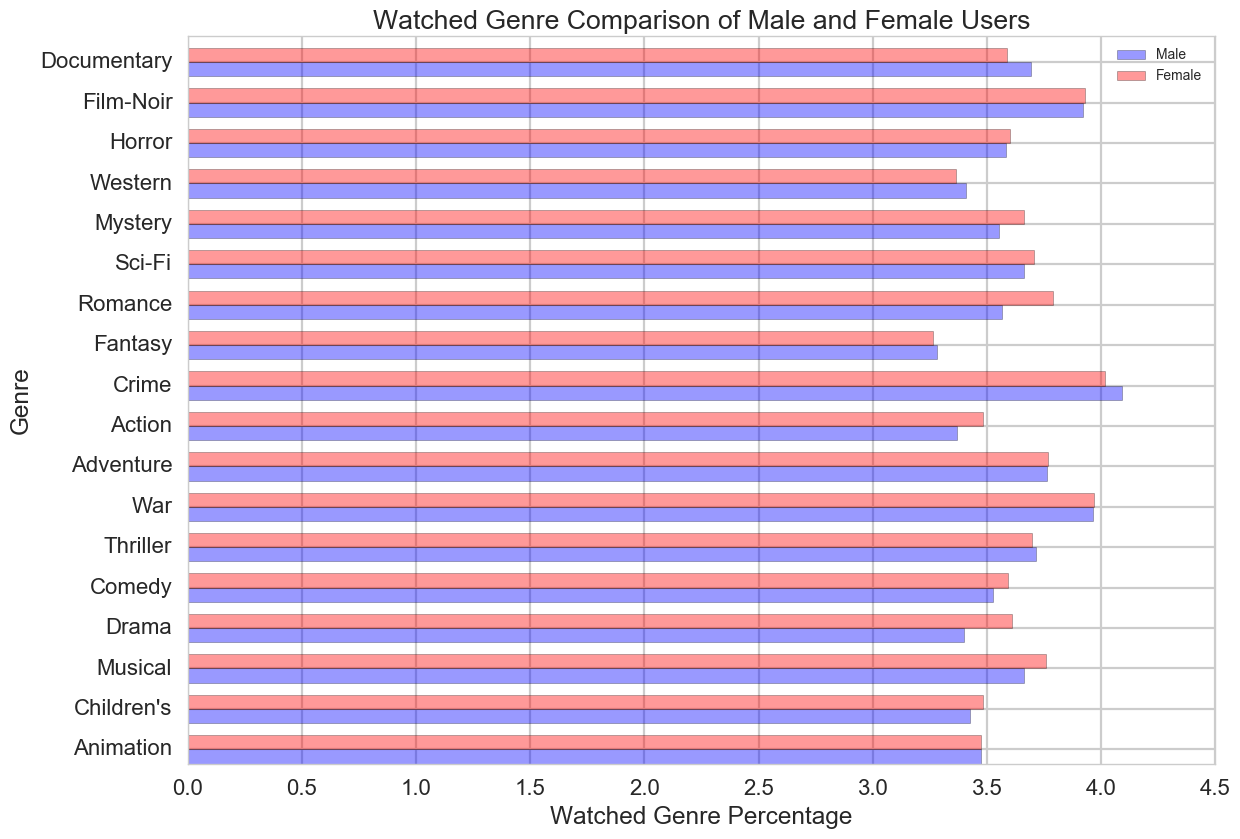

In [32]:
#Plotting Graph between the watched genre of Male VS Female Users
ff = final.drop_duplicates('Genre')
ff = ff['Genre']
M_GenreNumpy = male_genre.as_matrix()
F_GenreNumpy = female_genre.as_matrix()
n_groups = ff.count()

means_men = M_MeanNumpy
means_women = F_MeanNumpy

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = plt.barh(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 #error_kw=error_config,
                 label='Male')

rects2 = plt.barh(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 #error_kw=error_config,
                 label='Female')

plt.xlabel('Watched Genre Percentage')
plt.ylabel('Genre')
plt.title('Watched Genre Comparison of Male and Female Users')
plt.yticks(index + bar_width, numpyMatrix)
plt.legend(loc=1,prop={'size':10})

plt.tight_layout()
plt.show()

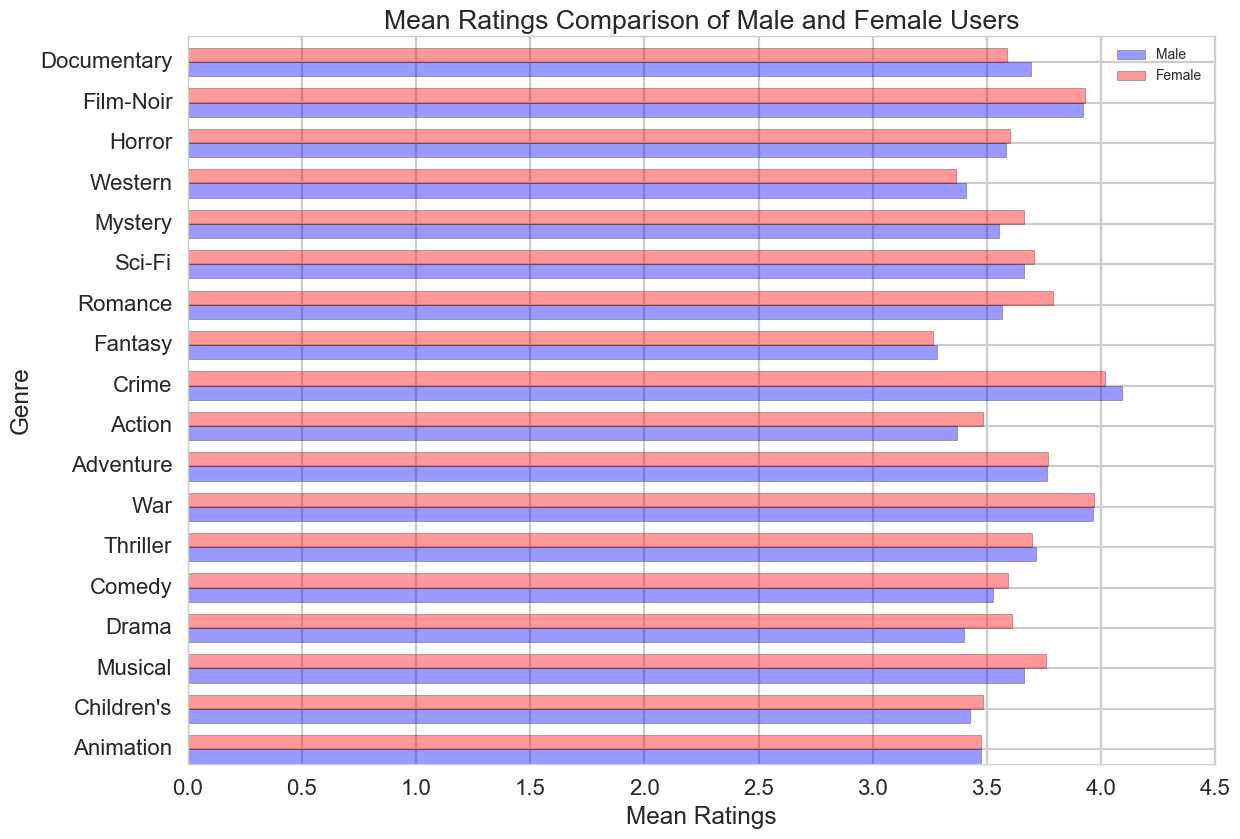

In [33]:
#Plotting Graph between the Mean ratings of Male VS Female Users

n_groups = ff.count()

means_men = M_MeanNumpy
means_women = F_MeanNumpy

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
#error_config = {'ecolor': '0.3'}

rects1 = plt.barh(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 #error_kw=error_config,
                 label='Male')

rects2 = plt.barh(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 #error_kw=error_config,
                 label='Female')

plt.xlabel('Mean Ratings')
plt.ylabel('Genre')
plt.title('Mean Ratings Comparison of Male and Female Users')
plt.yticks(index + bar_width, numpyMatrix)
plt.legend(loc=1,prop={'size':10})

plt.tight_layout()
plt.show()

In [35]:
#what movie has highest average rating

high_ratings=f.groupby('Movie_Name')['Rating'].mean()
high_ratings.sort_values(ascending=False)

Movie_Name
Bittersweet Motel                                                  5.000000
Ulysses (Ulisse)                                                   5.000000
Lured                                                              5.000000
Follow the Bitch                                                   5.000000
Song of Freedom                                                    5.000000
Gate of Heavenly Peace, The                                        5.000000
Schlafes Bruder (Brother of Sleep)                                 5.000000
One Little Indian                                                  5.000000
Baby, The                                                          5.000000
Smashing Time                                                      5.000000
I Am Cuba (Soy Cuba/Ya Kuba)                                       4.800000
Lamerica                                                           4.750000
Apple, The (Sib)                                                   4.666667
S

In [36]:
f=final
f[(f.User_ID==1) & (f.Movie_ID==1)]

,Movie_ID,Movie_Name,Year,Genre,User_ID,Sex,Age_Group,Occupation,Profession,Rating
0,1,Toy Story,1995,Animation,1,F,1,10,K-12 Student,5
2077,1,Toy Story,1995,Children's,1,F,1,10,K-12 Student,5
4154,1,Toy Story,1995,Comedy,1,F,1,10,K-12 Student,5


In [37]:
#Using the below dataframe for calculating the Solutions for the recommendation problem.
df1.head()
df1.columns = [x.strip().replace(' ', '_') for x in df1.columns]
movie_lens = df1.merge(Users)
#Replacing the space in the column names


In [38]:
#classification of M/F according to age group/Profession

In [39]:
#Mean Ratings based on Age Group and Visualizing it
age_ratings=movie_lens.groupby('Age_Group')['Rating'].mean()
age_ratings

Age_Group
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: Rating, dtype: float64

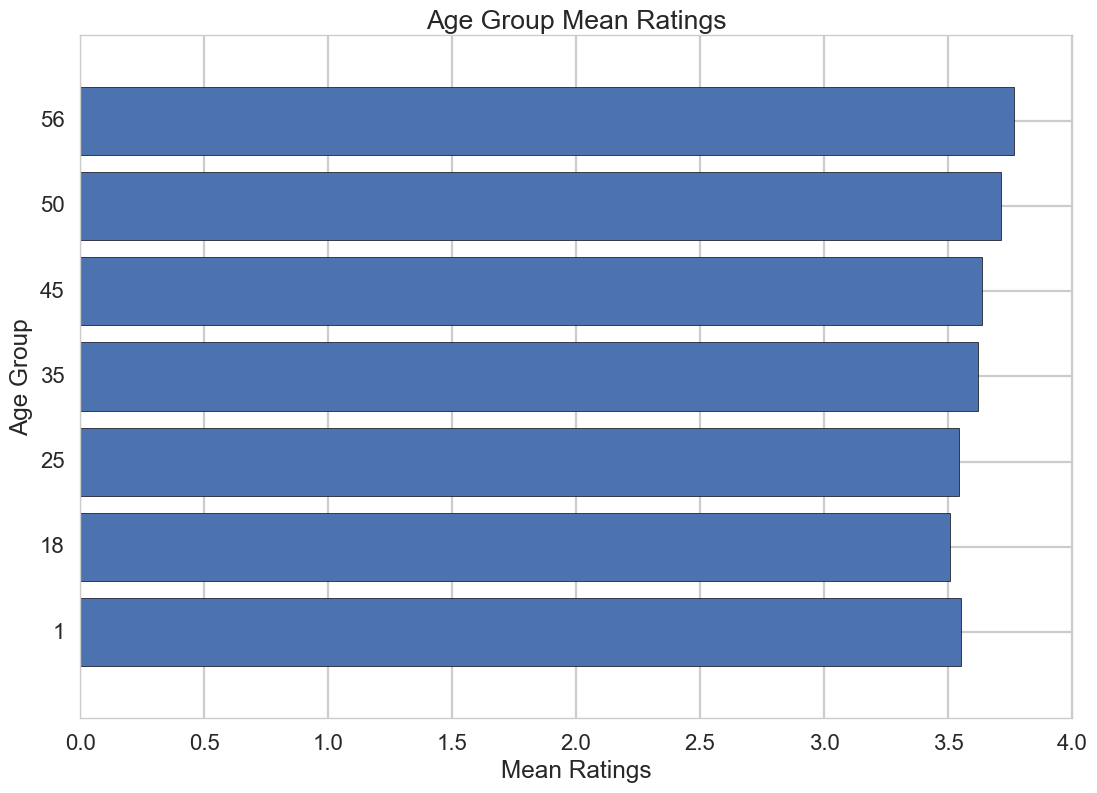

In [40]:
pos = np.arange(movie_lens.Age_Group.nunique())  # the bar centers on the y axis
plt.barh(pos,movie_lens.groupby('Age_Group')['Rating'].mean(), align='center')
plt.yticks(pos, (age_ratings.index))
plt.xlabel('Mean Ratings')
plt.ylabel('Age Group')
plt.title('Age Group Mean Ratings')

In [41]:
#Mean Ratings based on Profession
profession_ratings=movie_lens.groupby('Profession')['Rating'].mean()
profession_ratings

Profession
Academic            3.576642
Artist              3.573081
Clerk               3.656516
College Student     3.536793
Craftsman           3.530117
Customer Service    3.537529
Doctor              3.661578
Engineer            3.613574
Farmer              3.466741
HomeMaker           3.656589
K-12 Student        3.532675
Lawyer              3.617371
Manager             3.599772
Other               3.537544
Programmer          3.654001
Retired             3.781736
Sales               3.618481
Scientist           3.689774
Self-Employed       3.596575
Unemployed          3.414050
Writer              3.497392
Name: Rating, dtype: float64

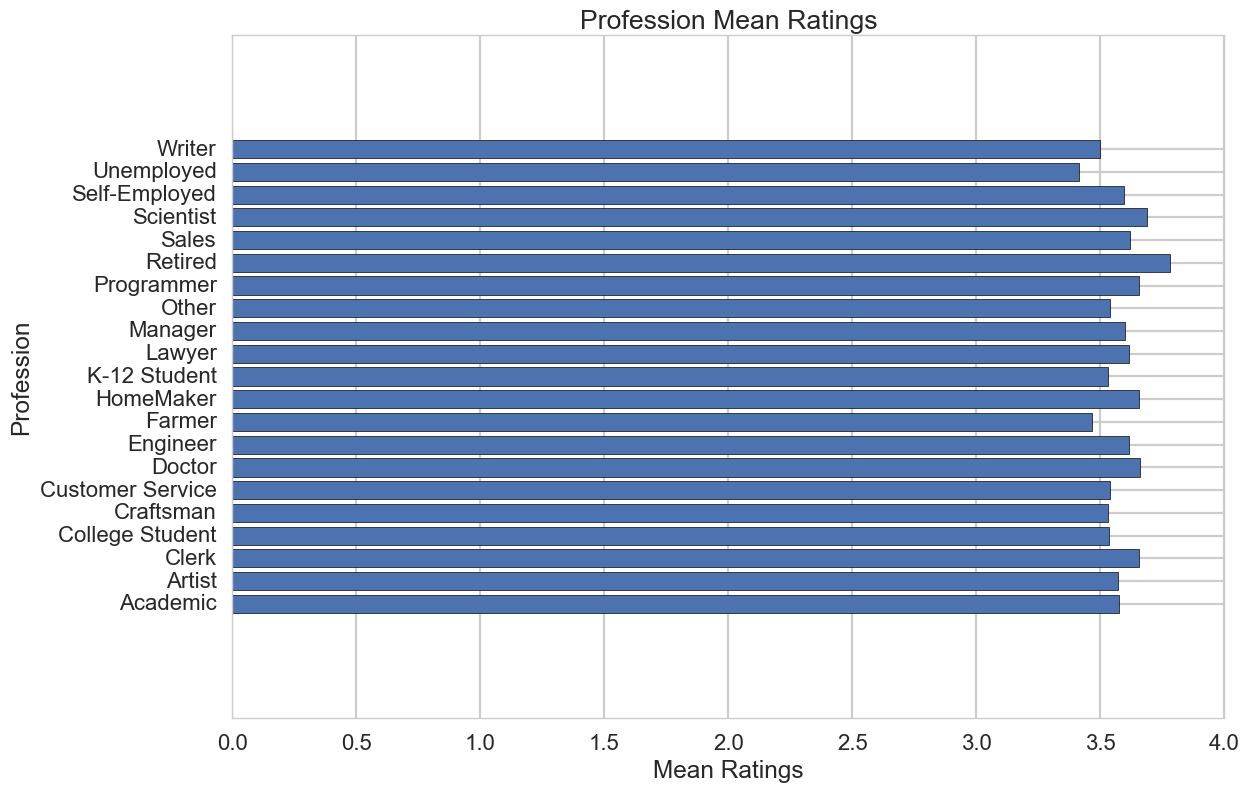

In [42]:
pos = np.arange(movie_lens.Profession.nunique())  # the bar centers on the y axis
plt.barh(pos,movie_lens.groupby('Profession')['Rating'].mean(), align='center')
plt.yticks(pos, (profession_ratings.index))
plt.xlabel('Mean Ratings')
plt.ylabel('Profession')
plt.title('Profession Mean Ratings')

plt.show()

In [120]:
#Mean Rating of a specific user

ratings = movie_lens
ratings['Rating'].mean()

3.581564453029317

In [44]:
movie_lens.shape

(1000209, 12)

In [45]:
#Dividing the data into Training and Testing set.

train, test = train_test_split(movie_lens, test_size = 0.2)

In [46]:
train.shape

(800167, 12)

In [47]:
test.shape

(200042, 12)

In [48]:
def compute_rmse(y_pred, y_true):
    """ Compute Root Mean Squared Error. """
    
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2)))

In [49]:
def evaluate(estimate_f):
    """ RMSE-based predictive performance evaluation with pandas. """
    
    ids_to_estimate = zip(test.User_ID, test.Movie_ID)
    estimated = np.array([estimate_f(u,i) for (u,i) in ids_to_estimate])
    real = test.Rating.values
    return compute_rmse(estimated, real)

In [50]:
def my_estimate_function(user_id,movie_id):
    return 3

In [51]:
print('RMSE for my estimate function %s' % evaluate(my_estimate_function))

RMSE for my estimate function 1.25873836492


In [52]:
#Content-based Filterting using Mean Ratings

def content_mean(user_id, movie_id):
    """ Simple content-filtering based on mean ratings. """
    
    user_condition = train.User_ID == user_id
    return train.loc[user_condition, 'Rating'].mean()

print ('RMSE for estimate1: %s' % evaluate(content_mean))


RMSE for estimate1: 1.03591950101


In [53]:
#Collaborative-based Filtering using Mean Ratings

def collab_mean(user_id, movie_id):
    user_condition = train.User_ID != user_id
    movie_condition = train.Movie_ID == movie_id
    ratings_by_others = train.loc[user_condition & movie_condition]
    if ratings_by_others.empty:
        return 3.0
    else:
        return ratings_by_others.Rating.mean()
    
print('RMSE for Estimate 2 %s' % evaluate(collab_mean))




RMSE for Estimate 2 0.977765812754


In [54]:
user_info = users.set_index('User_ID')
user_info.head()

,Sex,Age_Group,Occupation,Zipcode,Profession
User_ID,,,,,
1,F,1,10,48067,K-12 Student
2,M,56,16,70072,Self-Employed
3,M,25,15,55117,Scientist
4,M,45,7,2460,Manager
5,M,25,20,55455,Writer


In [55]:
def collab_gender(user_id, movie_id):
    """ Collaborative filtering using an implicit sim(u,u') based on gender. """
    
    user_condition = train.User_ID != user_id
    movie_condition = train.Movie_ID == movie_id
    ratings_by_others = train.loc[user_condition & movie_condition]
    if ratings_by_others.empty: 
        return 3.0
    
    means_by_gender = ratings_by_others.pivot_table('Rating', index='Movie_ID', columns='Sex')
    user_gender = user_info.ix[user_id, 'Sex']
    if user_gender in means_by_gender.columns: 
        return means_by_gender.ix[movie_id, user_gender]
    else:
        return means_by_gender.ix[movie_id].mean()

print ('RMSE for collab_gender: %s' % evaluate(collab_gender))

RMSE for collab_gender: 0.977377249197


In [157]:
class CollabGenderReco:
    """ Collaborative filtering using an implicit sim(u,u'). """

    def learn(self):
        """ Prepare datastructures for estimation. """
        
        self.means_by_gender = train.pivot_table('Rating', index='Movie_ID', columns='Sex')

    def estimate(self, user_id, movie_id):
        """ Mean ratings by other users of the same sex. """
        
        if movie_id not in self.means_by_gender.index: 
            return 3.0
        
        user_gender = user_info.ix[user_id, 'Sex']
        if ~np.isnan(self.means_by_gender.ix[movie_id, user_gender]):
            return self.means_by_gender.ix[movie_id, user_gender]
        else:
            return self.means_by_gender.ix[movie_id].mean()

In [158]:
reco = CollabGenderReco()
reco.learn()
print ('RMSE for CollabGenderReco: %s' % evaluate(reco.estimate))

RMSE for CollabGenderReco: 0.977377249197


In [141]:
ratings= Users


,User_ID,Sex,Age_Group,Occupation,Zipcode,Profession,Movie_ID,Movie_Name,Year,Rating
0,1,F,1,10,48067,K-12 Student,1,Toy Story,1995,5


In [160]:
ratings.head()

,User_ID,Movie_ID,Rating
0,1,1,5
1,1,1028,5
2,1,783,4
3,1,783,4
4,1,783,4


In [156]:
n_users = ratings.User_ID.unique().shape[0]
n_movies = ratings.Movie_ID.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_movies) + ' movies')

6040 users
3514 movies


In [2]:
ratings_users = np.zeros((n_users,n_movies))
for row in ratings.itertuples():
    ratings_users[row[1]-1, row[2]-1] = row[3]
ratings_users

NameError: name 'np' is not defined

In [ ]:
sparsity = float(len(ratings_users.nonzero()[0]))
sparsity /= (ratings_users.shape[0] * ratings_users.shape[1])
sparsity *= 100
print ('Sparsity: {:4.2f}%'.format(sparsity))

In [ ]:
ratings_train, ratings_test = train_test_split(ratings_users, test_size = 0.2)

In [ ]:
ratings_train

In [ ]:
ratings_test

In [ ]:
def fast_similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon -> small number for handling divided-by-zero errors
    if kind == 'user':
        sim = ratings_users.dot(ratings_users.T) + epsilon
    elif kind == 'movie':
        sim = ratings_users.T.dot(ratings_users) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [ ]:
%timeit fast_similarity(ratings_train, kind='user')

In [ ]:
user_similarity = fast_similarity(ratings_train, kind='user')
movie_similarity = fast_similarity(ratings_train, kind='movie')
print (movie_similarity[:4, :4])


In [ ]:
def predict_slow_simple(ratings, similarity, kind='user'):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :].dot(ratings[:, j])\
                             /np.sum(np.abs(similarity[i, :]))
        return pred
    elif kind == 'movie':
        for i in range(ratings.shape[0]):
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[j, :].dot(ratings[i, :].T)\
                             /np.sum(np.abs(similarity[j, :]))

        return pred

In [ ]:
def predict_fast_simple(ratings, similarity, kind='user'):
    if kind == 'user':
        return similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'movie':
        return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [ ]:
predict_fast_simple(ratings_train, movie_similarity, kind='movie')

In [ ]:
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
movie_prediction = predict_fast_simple(ratings_train, movie_similarity, kind='movie')
#user_prediction = predict_fast_simple(ratings_train, user_similarity, kind='user')

#print ('User-based CF MSE: ' + str(get_mse(user_prediction, test)))
print ('Movie-based CF MSE: ' + str(get_mse(movie_prediction, ratings_test)))

In [ ]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'movie':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [ ]:
pred = predict_topk(ratings_train, movie_similarity, kind='movie', k=500)
print ('Top-k Item-based CF MSE: ' + str(get_mse(pred, ratings_test)))

In [ ]:

# Load in movie data
idx_to_movie = {}
with open('u.item', 'r') as f:
    for line in f.readlines():
        info = line.split('|')
        idx_to_movie[int(info[0])-1] = info[4]

def top_k_movies(similarity, mapper, movie_idx, k=10):
    return [mapper[x] for x in np.argsort(similarity[movie_idx,:])[:-k-1:-1]]

In [ ]:
from sklearn.metrics import pairwise_distances
# Convert from distance to similarity
item_correlation = 1 - pairwise_distances(ratings_train.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0.

In [ ]:
idx = 0 # Toy Story
movies = top_k_movies(item_correlation, idx_to_movie, idx)
movies

In [ ]:

k_array = [5, 15, 30, 50, 100, 200]

item_test_mse = []
item_train_mse = []

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

for k in k_array:
    item_pred = predict_topk(ratings_train, movie_similarity, kind='movie', k=k)
    item_train_mse += [get_mse(item_pred, ratings_train)]
    item_test_mse += [get_mse(item_pred, ratings_test)]  

In [ ]:
sns.set()
pal = sns.color_palette("Set2", 2)
plt.figure(figsize=(8, 8))
plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MSE', fontsize=30);